In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

df = pd.read_json("./filtered.json")

df.head(10)

,category,author
0,U.S. NEWS,Carla K. Johnson
1,U.S. NEWS,Mary Papenfuss
2,COMEDY,Elyse Wanshel
3,PARENTING,Caroline Bologna
4,U.S. NEWS,Nina Golgowski
5,U.S. NEWS,Elyse Wanshel
6,WORLD NEWS,DÁNICA COTO
7,CULTURE & ARTS,Marina Fang
8,WORLD NEWS,Aamer Madhani
9,WORLD NEWS,GRAHAM DUNBAR


In [17]:
print(len(df))
print(df['author'].nunique())
print(df['category'].nunique())
print(df['author'].value_counts().head(40))

42533
26836
42
Ron Dicker               39
Dominique Mosbergen      38
Ryan Grenoble            37
Carla Herreria           36
Cavan Sieczkowski        33
Elyse Wanshel            32
Hilary Hanson            29
Nina Golgowski           29
Lydia O'Connor           29
Kim Bellware             28
Lee Moran                28
...                      28
David Moye               28
Jenna Amatulli           28
Nick Visser              26
Sara Boboltz             26
Emily Thomas             26
Rebecca Shapiro          26
Ed Mazza                 25
Sebastian Murdock        25
Alana Horowitz Satlin    25
Andy Campbell            25
Reuters                  25
Doha Madani              25
Kate Abbey-Lambertz      25
Mary Papenfuss           24
blogger                  24
Quora                    23
Sarah Barness            23
Joseph Erbentraut        23
Carly Ledbetter          23
Kira Brekke              23
James Cave               23
Andres Jauregui          23
Chris D'Angelo           23
Hayle

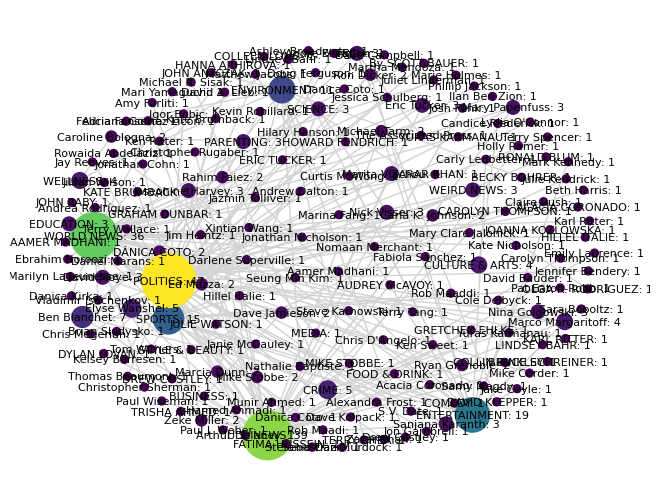

In [4]:
ShowGraph = nx.Graph()

for index, row in df.head(200).iterrows():
    ShowGraph.add_node(row.author, type='author')
    ShowGraph.add_node(row.category, type='category')
    ShowGraph.add_edge(row.author, row.category)

node_sizes = [deg * 32 for (node, deg)  in ShowGraph.degree()]
node_colors = [deg for (node, deg)  in ShowGraph.degree()]


GraphLayout = nx.arf_layout(ShowGraph, scaling=0.5)
nx.draw(ShowGraph, GraphLayout, node_size=node_sizes, node_color=node_colors, cmap=cm.viridis, edge_color='lightgray')

labels = {node: f"{node}: {deg}" for (node, deg)  in ShowGraph.degree()}
nx.draw_networkx_labels(ShowGraph, GraphLayout, labels=labels, font_size=8)

plt.figure(figsize=(8, 8))
plt.show()

In [5]:
RealGraph = nx.Graph()

for index, row in df.iterrows():
    RealGraph.add_node(row.author, type='author')
    RealGraph.add_node(row.category, type='category')
    RealGraph.add_edge(row.author, row.category)

SortedDegrees = sorted(RealGraph.degree(), key=lambda pair: -pair[1])

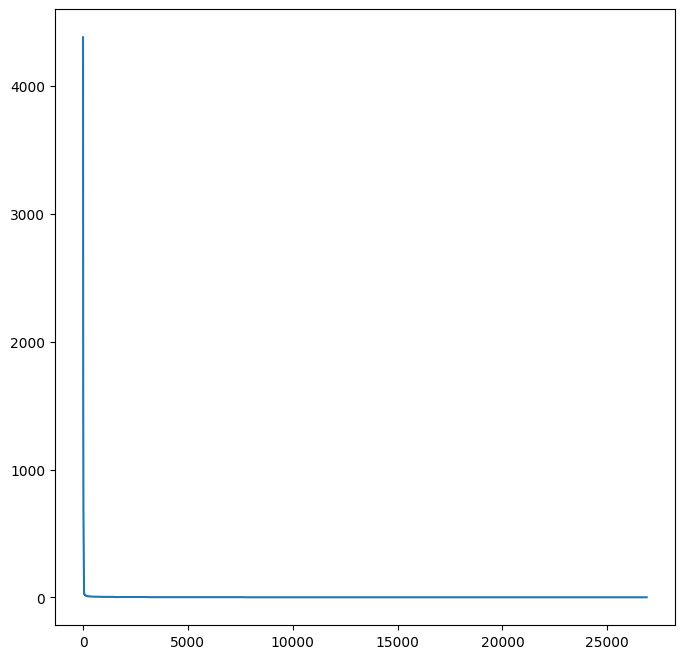

In [14]:
plt.figure(figsize=(8, 8))

xs = np.array(range(len(SortedDegrees)))
ys = np.array(list(map(lambda x: x[1], SortedDegrees)))

plt.plot(xs, ys)
plt.show()

In [16]:
SortedDegrees[:30]

[('POLITICS', 4380),
 ('WELLNESS', 3539),
 ('HEALTHY LIVING', 2840),
 ('IMPACT', 2337),
 ('PARENTING', 2104),
 ('BUSINESS', 1941),
 ('QUEER VOICES', 1699),
 ('TRAVEL', 1684),
 ('PARENTS', 1573),
 ('WOMEN', 1425),
 ('ENTERTAINMENT', 1342),
 ('WORLD NEWS', 1105),
 ('THE WORLDPOST', 1084),
 ('BLACK VOICES', 1021),
 ('RELIGION', 994),
 ('GREEN', 947),
 ('WORLDPOST', 906),
 ('STYLE & BEAUTY', 792),
 ('SPORTS', 732),
 ('WEDDINGS', 687),
 ('COLLEGE', 638),
 ('EDUCATION', 595),
 ('FOOD & DRINK', 594),
 ('CRIME', 586),
 ('DIVORCE', 584),
 ('MEDIA', 579),
 ('COMEDY', 555),
 ('ARTS', 535),
 ('TECH', 500),
 ('FIFTY', 472)]

(array([2.6848e+04, 1.3000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 4.3890e+02, 8.7680e+02, 1.3147e+03, 1.7526e+03,
        2.1905e+03, 2.6284e+03, 3.0663e+03, 3.5042e+03, 3.9421e+03,
        4.3800e+03]),
 <BarContainer object of 10 artists>)

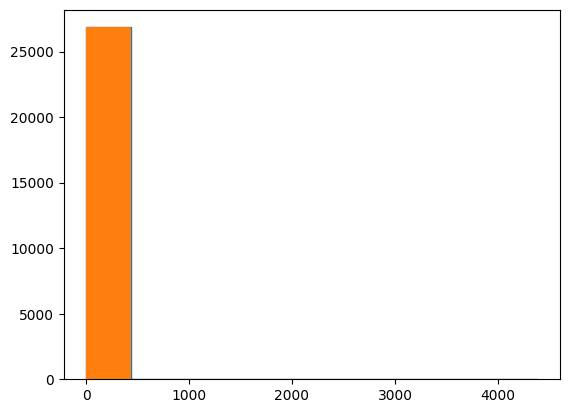

In [18]:
counts, bins = np.histogram(list(map(lambda x: x[1], SortedDegrees)))
plt.stairs(counts, bins)
plt.hist(bins[:-1], bins, weights=counts)